## By : Saurav Kumar

## GRIP - The Sparks Foundation
### Data Science and Business Analytics Internship

### Task 1 - Predict the score of student based on the number of study hours

## I. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## II. Importing the Dataset 

In [2]:
dataset = pd.read_csv('student_scores.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## III. Exploring the Dataset

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### There are no null values in our dataset.

In [6]:
dataset.shape

(25, 2)

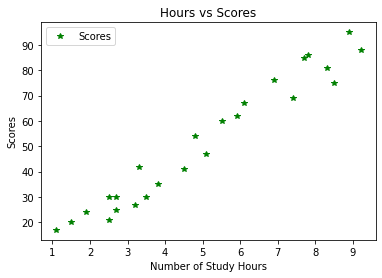

In [7]:
dataset.plot(x='Hours', y='Scores', style='*',color='green')
plt.title('Hours vs Scores')
plt.xlabel('Number of Study Hours')
plt.ylabel('Scores')
plt.show()

#### This shows that score is linearly dependent on the number of study hours. 

C:\Users\saura\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

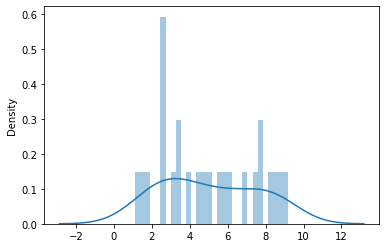

In [8]:
import seaborn as sns
sns.distplot(X,bins=30)

##### Since the data is also continuous, there aren't any outliers.

<AxesSubplot:>

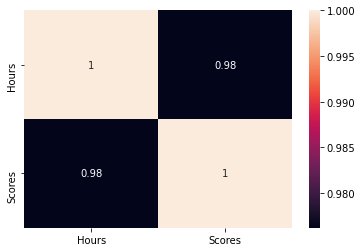

In [9]:
sns.heatmap(dataset.corr(), xticklabels = dataset.corr().columns, yticklabels = dataset.corr().columns, annot = True)

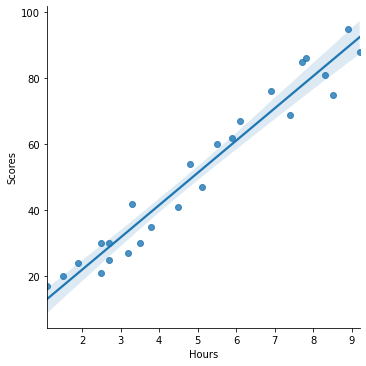

In [10]:
sns.lmplot(x="Hours", y="Scores", data=dataset);

## IV. Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## V. Training the Simple Linear Regression model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## VI. Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
y_pred

array([17.37142335, 52.70292295, 35.03717315, 34.05574261, 46.81433968])

## VII. Visualising the Training set results

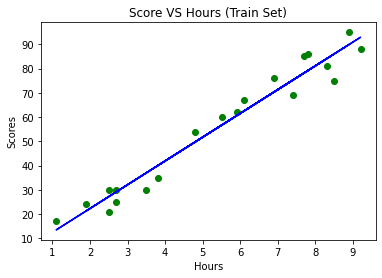

In [14]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')
plt.title('Score VS Hours (Train Set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## VIII. Prediction with new values

In [15]:
test_hours=20
print('Predicted Value: ',regressor.predict([[test_hours]])[0])

Predicted Value:  198.93607404955657


## IX. Evaluating the model 

<strong> MAE = True values – Predicted values </strong><br>
    MAE takes the <strong>average</strong> of this error from every sample in a dataset and gives the output.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.632881746692995


# Thank you